In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [3]:
data = pd.read_csv('./stats/dataClean v2.csv')

In [4]:
data.head()

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,totalSEE,numMedCond,EthCat,backpain,depression,highBP,falling_1,falling_2,falling_3,fallsBin
0,18.752067,-0.275275,0.27,0.631539,0.058177,66.356510,29.013062,174.921910,92.965645,173.194095,...,7.333333,3,1,0,0,0,5,0,0,0
1,13.346667,-0.216883,0.37,0.395926,0.071269,69.628002,26.293871,188.856174,110.926374,184.429725,...,4.666667,0,1,0,0,0,0,0,0,0
2,9.175833,0.108442,0.54,0.152175,0.044839,80.953823,30.219053,181.651735,96.723395,180.520050,...,2.888889,0,1,0,0,0,1,0,0,0
3,13.791667,0.133333,0.36,0.234965,0.031573,72.900182,29.519413,184.377372,103.622265,180.242772,...,6.777778,0,1,0,0,0,2,1,0,0
4,11.444767,-0.108442,0.44,0.225910,0.045701,71.881103,27.642812,186.287796,104.791805,179.420205,...,5.333333,0,1,0,0,0,2,0,0,0


In [9]:
data['fallsBin'].value_counts()

fallsBin
0    371
1     34
Name: count, dtype: int64

In [225]:
34/371

0.09164420485175202

In [228]:
def kde_plot(data, feature, save_path):
    # Separate data by binary outcome
    data_0 = data[data['fallsBin'] == 0][feature]
    data_1 = data[data['fallsBin'] == 1][feature]

    feature = feature.replace('_', ' ').title()

    # Plot KDEs on the same graph
    plt.figure(figsize=(4, 2))
    sns.kdeplot(data_0, label='No Falls', fill=True, color='g')
    sns.kdeplot(data_1, label='Falls',fill=True, color='b')
    # plt.title(f'{feature}', fontdict={'fontname': 'Arial', 'fontsize': 12})
    plt.xlabel(feature, fontdict={'fontname': 'Arial', 'fontsize': 9})
    plt.ylabel('Density', fontdict={'fontname': 'Arial', 'fontsize': 9})
    plt.legend(prop={'family': 'Arial', 'size': 8})
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.get_offset_text().set_size(7)

    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.tick_params(axis='both', which='minor', labelsize=7)

    plt.savefig(f'./{save_path}/{feature}.png', dpi=300, bbox_inches='tight')
    plt.close()

In [204]:
for feature in list(data.columns):
    kde_plot(data, feature)

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_12560\420342226.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_0, label='No Falls', fill=True, color='g')
C:\Users\m93107ma\AppData\Local\Temp\ipykernel_12560\420342226.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_1, label='Falls',fill=True, color='b')
C:\Users\m93107ma\AppData\Local\Temp\ipykernel_12560\420342226.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={'family': 'Arial', 'size': 8})


In [254]:
def box_plot(data, feature, save_path):
    # Prepare data for boxplot
    feature_display_name = feature.replace('_', ' ').title()
    data['Feature'] = data[feature]
    data['Group'] = data['fallsBin'].apply(lambda x: 'No Falls' if x == 0 else 'Falls')

    # Plot boxplot
    plt.figure(figsize=(4, 2))
    boxplot = sns.boxplot(x='Group', y='Feature', data=data)

    
    # Set labels with Arial font
    # plt.xlabel('Group', fontdict={'fontname': 'Arial', 'fontsize': 9})
    plt.xlabel('')
    plt.ylabel(feature_display_name, fontdict={'fontname': 'Arial', 'fontsize': 9})

    # Adjust tick parameters
    ax = plt.gca()
    # ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # ax.yaxis.get_offset_text().set_size(7)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.tick_params(axis='both', which='minor', labelsize=7)

    # Save the figure
    # plt.savefig(f'{save_path}/{feature_display_name}.png', dpi=300, bbox_inches='tight')
    # plt.close()

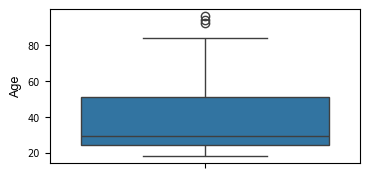

In [255]:
box_plot(data, 'Age', 'boxplots')

In [224]:
for feature in list(data.columns):
    box_plot(data, feature)

In [248]:
data_original = pd.read_csv('./stats/dataClean.csv')

In [249]:
significant = pd.read_csv('./stats/significant_features.csv', header=None)
significant_columns =list(np.array(significant).flatten())

In [250]:
for feature in significant_columns:
    try:
        box_plot(data_original, feature, 'Significant/Boxplots')
        kde_plot(data_original, feature, 'Significant/KDE Plots')
    except:
        print(f'{feature} does not exist in clean data')

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_12560\3322264318.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_0, label='No Falls', fill=True, color='g')
